This notebook produces histograms comparing the distributions of redshift and i magnitude for sdss dr7 and dr12 quasars matched to the GAIA survey.  The blue histograms are the full sdss dr7 and dr12 quasar distributions and the orange histograms overlaid on the blue are the portion of the full distribution that was detected by the GAIA survey.  

The matched data tables used (dr7_gaia_match.fits and dr12_gaia_match.fits) were produced by matching the full SDSS dr7 and dr12 quasar catalogs to the GAIA dr2 gaia_source catalog through the Gaia Archive (https://gea.esac.esa.int/archive/) with a matching radius of 1.0 arcseconds.  This produced a catalog of GAIA object IDs for all matching quasars, which were then crossmatched and joined to the gaiadr2.gaia_source catalog, then matched and joined once more back to the SDSS dr7 and dr12 quasar catalogs such that the resulting tables contain the data from both GAIA and SDSS for all dr7 and dr12 quasars imaged by GAIA.  

DR12 quasars: 297301,
DR7 quasars: 105783,
DR12 quasars in GAIA dr2: 191812,
DR7 quasars in GAIA dr2: 104329

In [1]:
import numpy as np
from astropy.table import Table
import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable
import richardsplot as rplot
%matplotlib inline

In [2]:
#declare some arrays to use for binning the histograms
bins_redshift = np.linspace(0,5, 50)
bins_imag = np.linspace(15,25,50)

In [3]:
#load in tables
#dr7 quasars matched to gaia
dr7_gaia_table = Table.read('dr7_gaia_match.fits') 
#all dr7 quasars
dr7_table = Table.read('dr7qso.fit.gz')
#these lines prevent an issue with astropy where masked columns lack the _mask attribute
dr7_table = dr7_table.filled()
dr7_gaia_table = dr7_gaia_table.filled()
#sort relevant data into arrays
dr7_gaia_redshifts = dr7_gaia_table['z']
dr7_redshifts = dr7_table['z']
dr7_gaia_imag = dr7_gaia_table['IMAG']
dr7_imag = dr7_table['IMAG']
dr7_pmra = dr7_gaia_table['pmra']
dr7_pmdec = dr7_gaia_table['pmdec']

c:\python27\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


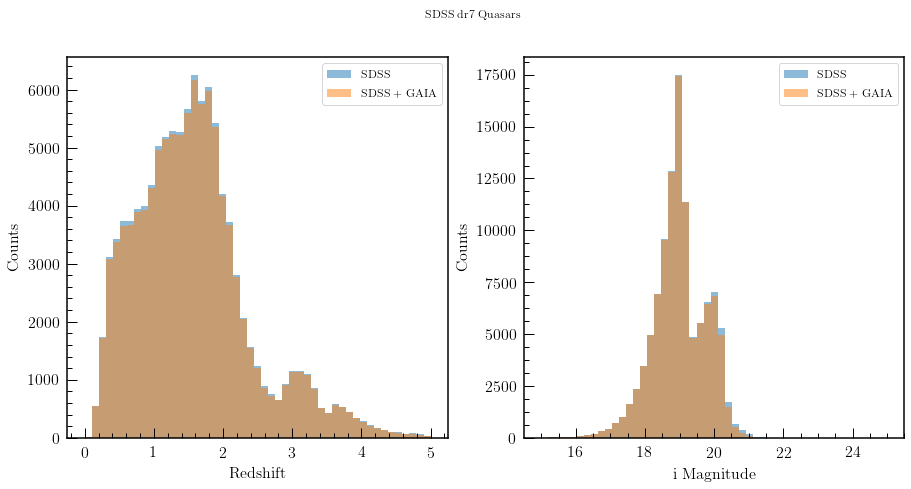

In [4]:
plt.figure(figsize=(15,7))
plt.suptitle('SDSS dr7 Quasars')
plt.subplot(121)
plt.hist(dr7_redshifts, bins_redshift, alpha = 0.5, label='SDSS')
plt.hist(dr7_gaia_redshifts, bins_redshift, alpha=0.5, label='SDSS + GAIA')
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.legend()
plt.subplot(122)
plt.hist(dr7_imag, bins_imag, alpha = 0.5, label='SDSS')
plt.hist(dr7_gaia_imag, bins_imag, alpha=0.5, label='SDSS + GAIA')
plt.xlabel('i Magnitude')
plt.ylabel('Counts')
plt.legend()

The above histograms show the distributions of redshift and i band magnitude for SDSS dr7 quasars.  In blue are the distributions of all 105783 SDSS dr7 quasars and overlaid in orange are the distributions of the 104329 dr7 quasars detected by GAIA.  

In [5]:
#clear out some memory for more tables
del dr7_gaia_table
del dr7_table
#load more tables
dr12_table = Table.read('DR12Q_nullfiltered.fits')
dr12_gaia_table = Table.read('dr12_gaia_match.fits')
dr12_gaia_table = dr12_gaia_table.filled()
#sort relevant data into arrays
dr12_gaia_redshifts = dr12_gaia_table['Z_VI']
dr12_redshifts = dr12_table['Z_VI']
dr12_gaia_iflux = dr12_gaia_table['PSFFLUX'].T[3] #PSFFLUX column has u, g, r, i, and z magnitudes in each row,
#so to extract just the i magnitudes I need to transpose it and select the fourth of the transposed columns (index 3)
dr12_iflux = dr12_table['PSFFLUX'].T[3]
dr12_pmra = dr12_gaia_table['pmra']
dr12_pmdec = dr12_gaia_table['pmdec']

In [6]:
dr12_gaia_imag = []
dr12_imag = []
for i in range(len(dr12_gaia_iflux)): #loop through fluxes to convert to magnitudes
    if not dr12_gaia_iflux[i] == 0:
        if not np.isnan(np.log10(dr12_gaia_iflux[i])): #make sure it won't be a nan
            imag = 22.5 - 2.5*np.log10(dr12_gaia_iflux[i]) #convert
            dr12_gaia_imag.append(imag) #append to array
for i in range(len(dr12_iflux)):
    if not dr12_iflux[i] == 0:
        if not np.isnan(np.log10(dr12_iflux[i])):
            imag = 22.5 - 2.5*np.log10(dr12_iflux[i])
            dr12_imag.append(imag)
            


c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


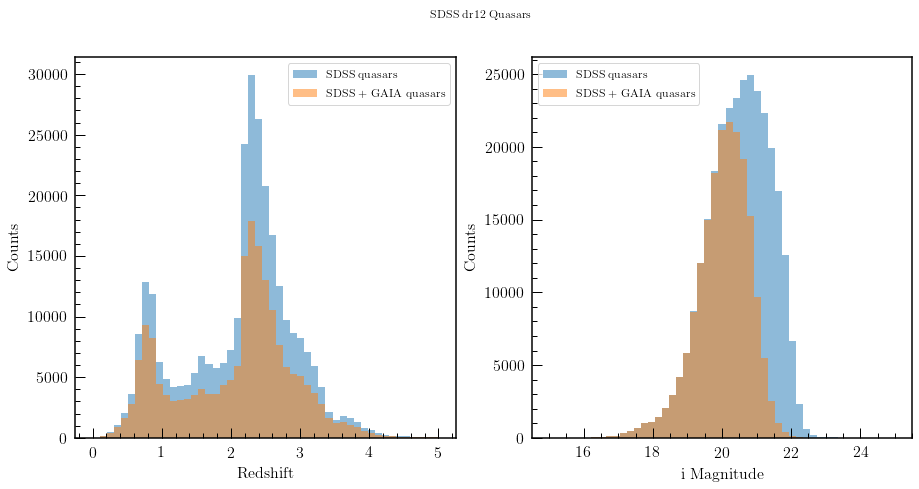

In [7]:
plt.figure(figsize=(15,7))
plt.suptitle('SDSS dr12 Quasars')
plt.subplot(121)
plt.hist(dr12_redshifts, bins_redshift, alpha = 0.5, label='SDSS quasars')
plt.hist(dr12_gaia_redshifts, bins_redshift, alpha = 0.5, label = 'SDSS + GAIA quasars')
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.legend()
plt.subplot(122)
plt.hist(dr12_imag, bins_imag, alpha=0.5, label = 'SDSS quasars')
plt.hist(dr12_gaia_imag, bins_imag, alpha=0.5, label = 'SDSS + GAIA quasars')
plt.xlabel('i Magnitude')
plt.ylabel('Counts')
plt.legend()
plt.savefig(fname = 'GAIAdr12quasars_z_imag.png', dpi = 300)

The above histograms show the distributions of redshift and i band magnitude for SDSS dr12 Quasars.  In blue are the distributions of all 297301 SDSS dr12 quasars and overlaid in orange are the distributions of the 191812 dr12 quasars that were detected by GAIA.  

In [8]:
#filter out proper motions that are nan's
dr7_pmra_filtered = []
dr7_pmdec_filtered = []
dr12_pmra_filtered = []
dr12_pmdec_filtered = []
#loop through dr7 proper motions to extract finite values
for i in range(len(dr7_pmra)):
    if np.isfinite(dr7_pmra[i]): #check for finite value in proper motion array
        dr7_pmra_filtered = np.append(dr7_pmra_filtered, dr7_pmra[i]) #append finite value to filtered array
        
for i in range(len(dr7_pmdec)):
    if np.isfinite(dr7_pmdec[i]):
        dr7_pmdec_filtered = np.append(dr7_pmdec_filtered, dr7_pmdec[i])
        
for i in range(len(dr12_pmra)):
    if np.isfinite(dr12_pmra[i]):
        dr12_pmra_filtered = np.append(dr12_pmra_filtered, dr12_pmra[i])
        
for i in range(len(dr12_pmdec)):
    if np.isfinite(dr12_pmdec[i]):
        dr12_pmdec_filtered = np.append(dr12_pmdec_filtered, dr12_pmdec[i])
        


In [9]:
#calculate absolute proper motions
dr7_pmabs = []
dr12_pmabs = []
#loop through the filtered arrays and calculate absolute magnitude proper motions from RA and Declination directions
for i in range(len(dr7_pmra_filtered)):
    dr7_PropMotAbs = np.sqrt((dr7_pmra_filtered[i]*dr7_pmra_filtered[i]) + (dr7_pmdec_filtered[i]*dr7_pmdec_filtered[i]))
    dr7_pmabs = np.append(dr7_pmabs, dr7_PropMotAbs)
    
for i in range(len(dr12_pmra_filtered)):
    dr12_PropMotAbs = np.sqrt((dr12_pmra_filtered[i]*dr12_pmra_filtered[i]) + (dr12_pmdec_filtered[i]*dr12_pmdec_filtered[i]))
    dr12_pmabs = np.append(dr12_pmabs, dr12_PropMotAbs)

Text(0.5,1,'SDSS dr12 Quasars')

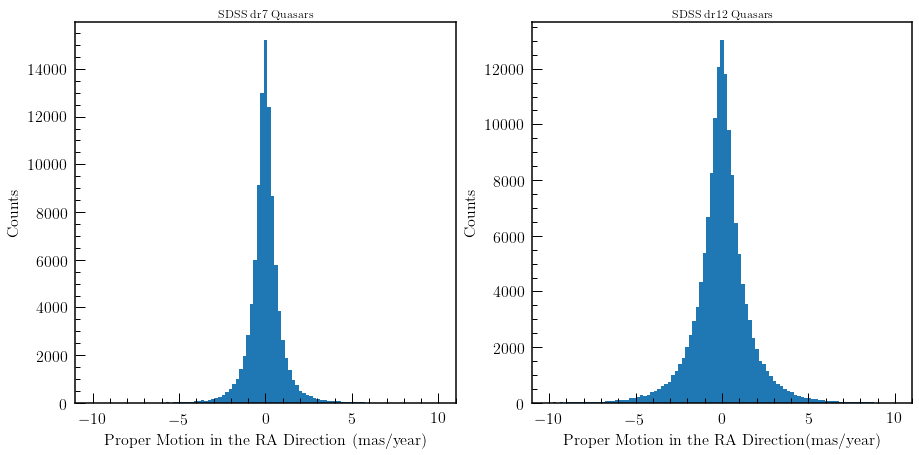

In [13]:
#declare bins for histograms
pmra_bins = np.linspace(-10, 10, 100)
pmdec_bins = np.linspace(-10, 10, 100)
pmabs_bins = np.linspace(0, 15, 100)
#plot
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(dr7_pmra_filtered, pmra_bins)
plt.xlabel('Proper Motion in the RA Direction (mas/year)')
plt.ylabel('Counts')
plt.title('SDSS dr7 Quasars')
plt.subplot(122)
plt.hist(dr12_pmra_filtered, pmra_bins)
plt.xlabel('Proper Motion in the RA Direction(mas/year)')
plt.ylabel('Counts')
plt.title('SDSS dr12 Quasars')

The above histograms show the distributions of proper motion in the RA direction for SDSS dr7 and dr12 quasars that were detected by GAIA.  dr7 quasars are shown in the left panel and dr12 quasars are shown in the right panel.  

Text(0.5,1,'SDSS dr12 Quasars')

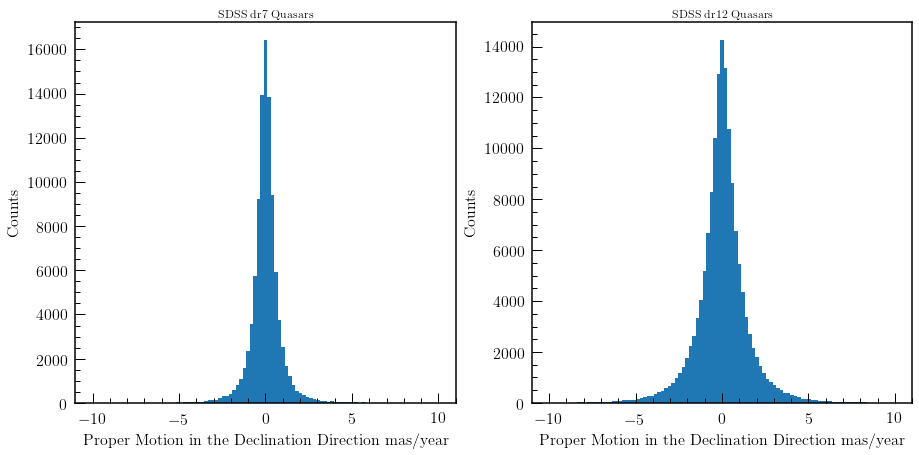

In [14]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(dr7_pmdec_filtered, pmdec_bins)
plt.xlabel('Proper Motion in the Declination Direction mas/year')
plt.ylabel('Counts')
plt.title('SDSS dr7 Quasars')
plt.subplot(122)
plt.hist(dr12_pmdec_filtered, pmdec_bins)
plt.xlabel('Proper Motion in the Declination Direction mas/year')
plt.ylabel('Counts')
plt.title('SDSS dr12 Quasars')

The histograms above show the distributions of proper motion in the declination direction for SDSS dr7 and dr12 quasars that were detected by GAIA. dr7 quasars are shown in the left panel, and dr12 quasars are shown in the right panel.  

Text(0.5,1,'SDSS dr12 Quasars')

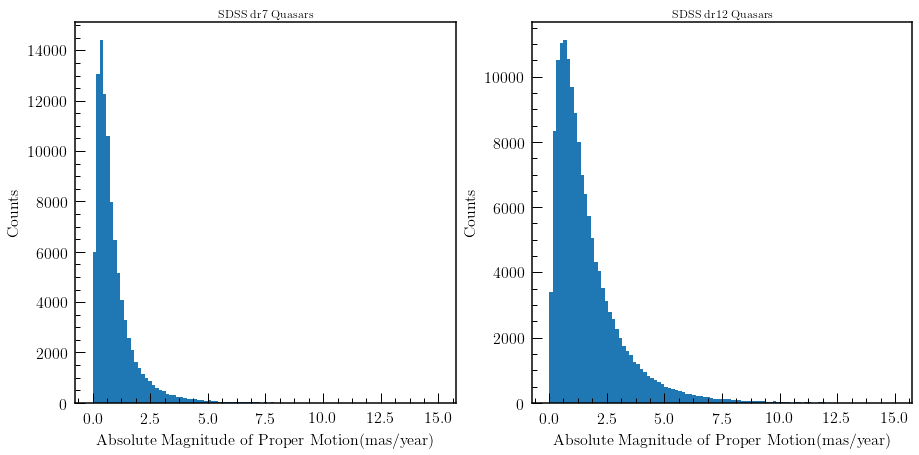

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(dr7_pmabs, pmabs_bins)
plt.xlabel('Absolute Magnitude of Proper Motion(mas/year)')
plt.ylabel('Counts')
plt.title('SDSS dr7 Quasars')
plt.subplot(122)
plt.hist(dr12_pmabs, pmabs_bins)
plt.xlabel('Absolute Magnitude of Proper Motion(mas/year)')
plt.ylabel('Counts')
plt.title('SDSS dr12 Quasars')

The histograms above show the distribution of absolute proper motion, as measured by GAIA, for SDSS dr7 and dr12 quasars, with dr7 quasars in the left panel and dr12 quasars in the right panel.  

In [16]:
#at this point, I no longer need any of my variables from before, so I reset to make room in the memory
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
#re-import all necessary packages
import numpy as np
from astropy.table import Table
import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable
import richardsplot as rplot
%matplotlib inline

In [18]:
#gaiadr2random.fits is a table of 3000000 randomly drawn objects from GAIA, to demonstrate the general distribution of 
#objects in the GAIA survey
gaiadr2table = Table.read('gaiadr2random.fits')
#extract proper motion in ra and dec directions
gaiadr2tablera = gaiadr2table['pmra']
gaiadr2tabledec = gaiadr2table['pmdec']


C:\Users\Ben\AppData\Roaming\Python\Python27\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ben\AppData\Roaming\Python\Python27\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5,1,'Randomly Drawn GAIA Objects')

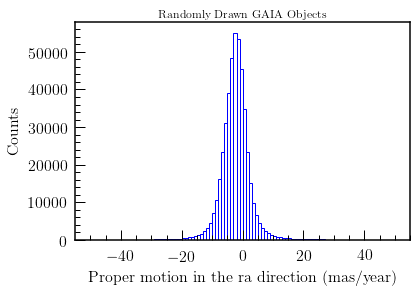

In [19]:
plt.hist(gaiadr2tablera, bins=100, range=(-50, 50), density=False, color='1', edgecolor='b')
plt.xlabel('Proper motion in the ra direction (mas/year)')
plt.ylabel('Counts')
plt.title('Randomly Drawn GAIA Objects')

The histogram above shows the distribution of proper motion in the RA direction for 600000 randomly drawn objects from the GAIA survey.  

Text(0.5,1,'Randomly Drawn GAIA Objects')

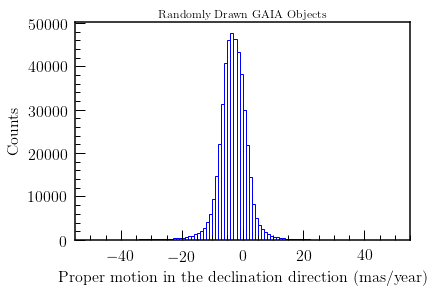

In [20]:
plt.hist(gaiadr2tabledec, bins=100, range=(-50, 50), density=False, color='1', edgecolor='b')
plt.xlabel('Proper motion in the declination direction (mas/year)')
plt.ylabel('Counts')
plt.title('Randomly Drawn GAIA Objects')

The histogram above shows the distribution of proper motion in the declination direction for 600000 randomly drawn objects from the GAIA survey.  

Text(0.5,1,'Randomly Drawn GAIA Objects')

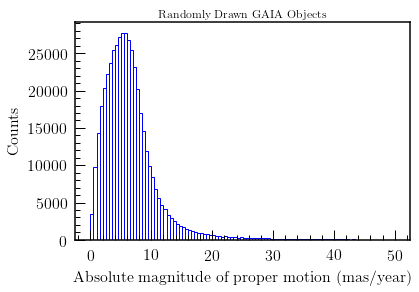

In [21]:
fulltable = np.empty(shape=len(gaiadr2tablera)) #declare empty array for absolute magnitudes
#loop through and calculate absolute magnitude proper motions
for i in range(len(fulltable)):
    if (not np.isnan(gaiadr2tablera[i])) and (not np.isnan(gaiadr2tabledec[i])): #check for nan's
        fulltable[i] = np.sqrt((gaiadr2tablera[i]*gaiadr2tablera[i])+(gaiadr2tabledec[i]*gaiadr2tabledec[i]))
    else:
        fulltable[i]= float('nan') #if either ra or dec is nan, replace absolute value with nan
plt.hist(fulltable, bins=100, range=(0, 50), density=False, color='1', edgecolor='b')
plt.xlabel('Absolute magnitude of proper motion (mas/year)')
plt.ylabel('Counts')
plt.title('Randomly Drawn GAIA Objects')

The above histogram shows the distribution of absolute magnitude of proper motion for randomly drawn objects from the GAIA survey, for comparison to the similar histogram above of absolute proper motion of only SDSS confirmed quasars.  

In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [16]:
#re-import
import numpy as np
from astropy.table import Table
import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable
import richardsplot as rplot
%matplotlib inline

In [17]:
#import tables, extract proper motions, then delete tables to save memory 

dr12_gaia_table = Table.read('dr12_gaia_match.fits') #dr12 quasars matched to GAIA
dr12_pmra = dr12_gaia_table['pmra'] #ra proper motion
dr12_pmdec = dr12_gaia_table['pmdec'] #declination proper motion
del dr12_gaia_table
dr7_gaia_table = Table.read('dr7_gaia_match.fits') #dr7 quasars matched to GAIA
dr7_pmra = dr7_gaia_table['pmra']
dr7_pmdec = dr7_gaia_table['pmdec']
del dr7_gaia_table
gaia_random_table = Table.read('gaiadr2random.fits') #randomly drawn objects from GAIA
random_pmra = gaia_random_table['pmra']
random_pmdec = gaia_random_table['pmdec']
del gaia_random_table




Exception MemoryError: MemoryError() in <bound method FITS_rec.__del__ of FITS_rec([(1635721458409799680, 'Gaia DR2 5933917302891851008', 5933917302891851008,  143674634, 2015.5, 246.58888335, 1.10250307, -52.64560373, 1.5316848 ,         nan,        nan,         nan,         nan,        nan,         nan,        nan, -0.7888559 ,         nan,         nan,         nan,         nan,         nan,         nan,         nan,        nan,         nan, 105, 0, 105, 0, -0.26139283,  95.69984, 0.        , 1.00485917e-15,  3, 70, 0.06254029,        nan,        nan, -0.03162072, 12,  7,  3.2521212 , 0, 23, 70, 113,  184.6206776 , 1.52389084,  121.150856, 20.022665,  0,           nan,         nan,        nan,       nan,  0,           nan,         nan,        nan,       nan,       nan, 2,       nan,        nan,        nan, nan, nan, 0, nan, nan, nan, 'NOT_AVAILABLE', 332.24810442, -2.46448461, 253.74909616, -30.51902012,     nan,       nan,       nan,   nan,    nan,    nan,    nan,    nan,    nan, na

In [18]:
#declare arrays to hold absolute magnitudes
fulltable = np.empty(shape=len(random_pmra))
dr7_pmabs = np.empty(shape=len(dr7_pmra))
dr12_pmabs = np.empty(shape=len(dr12_pmra))

#loop through empty arrays, calculate and assign absolute magnitudes
for i in range(len(fulltable)):
    if (not np.isnan(random_pmra[i])) and (not np.isnan(random_pmdec[i])): #check for nan's
        fulltable[i] = np.sqrt((random_pmra[i]*random_pmra[i])+(random_pmdec[i]*random_pmdec[i]))
    else:
        fulltable[i]= float('nan') #if either ra or dec is nan, replace absolute value with nan
        
for i in range(len(dr7_pmabs)):
    if (not np.isnan(dr7_pmra[i])) and (not np.isnan(dr7_pmdec[i])): #check for nan's
        dr7_pmabs[i] = np.sqrt((dr7_pmra[i]*dr7_pmra[i])+(dr7_pmdec[i]*dr7_pmdec[i]))
    else:
        dr7_pmabs[i]= float('nan') #if either ra or dec is nan, replace absolute value with nan
        
for i in range(len(dr12_pmabs)):
    if (not np.isnan(dr12_pmra[i])) and (not np.isnan(dr12_pmdec[i])): #check for nan's
        dr12_pmabs[i] = np.sqrt((dr12_pmra[i]*dr12_pmra[i])+(dr12_pmdec[i]*dr12_pmdec[i]))
    else:
        dr12_pmabs[i]= float('nan') #if either ra or dec is nan, replace absolute value with nan
        

Text(0.5,0.98,'Proper Motions in the RA Direction')

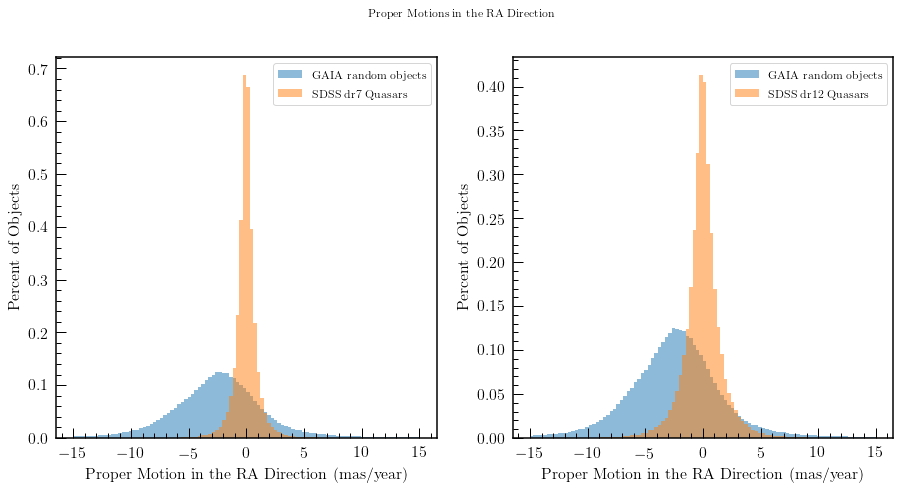

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(random_pmra, bins=100, range = (-15, 15), alpha=0.5, label = 'GAIA random objects', density = True)
plt.hist(dr7_pmra, bins = 100, range = (-15, 15), alpha=0.5, label = 'SDSS dr7 Quasars', density = True)
plt.xlabel('Proper Motion in the RA Direction (mas/year)')
plt.ylabel('Percent of Objects')
plt.legend()
plt.subplot(122)
plt.hist(random_pmra, bins = 100, range = (-15, 15), alpha=0.5, label = 'GAIA random objects', density = True)
plt.hist(dr12_pmra, bins = 100, range = (-15, 15), alpha=0.5, label = 'SDSS dr12 Quasars', density = True)
plt.xlabel('Proper Motion in the RA Direction (mas/year)')
plt.ylabel('Percent of Objects')
plt.legend()
plt.suptitle('Proper Motions in the RA Direction')

Text(0.5,0.98,'Proper Motions in the Declination Direction')

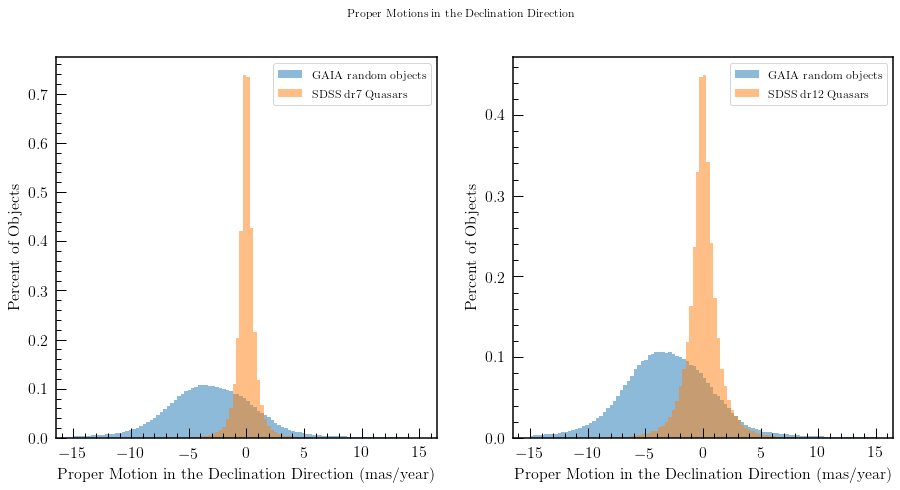

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(random_pmdec, bins=100, range = (-15, 15), alpha=0.5, label = 'GAIA random objects', density = True)
plt.hist(dr7_pmdec, bins = 100, range = (-15, 15), alpha=0.5, label = 'SDSS dr7 Quasars', density = True)
plt.xlabel('Proper Motion in the Declination Direction (mas/year)')
plt.ylabel('Percent of Objects')
plt.legend()
plt.subplot(122)
plt.hist(random_pmdec, bins = 100, range = (-15, 15), alpha=0.5, label = 'GAIA random objects', density = True)
plt.hist(dr12_pmdec, bins = 100, range = (-15, 15), alpha=0.5, label = 'SDSS dr12 Quasars', density = True)
plt.xlabel('Proper Motion in the Declination Direction (mas/year)')
plt.ylabel('Percent of Objects')
plt.legend()
plt.suptitle('Proper Motions in the Declination Direction')

Text(0.5,0.98,'Absolute Magnitudes of Proper Motion')

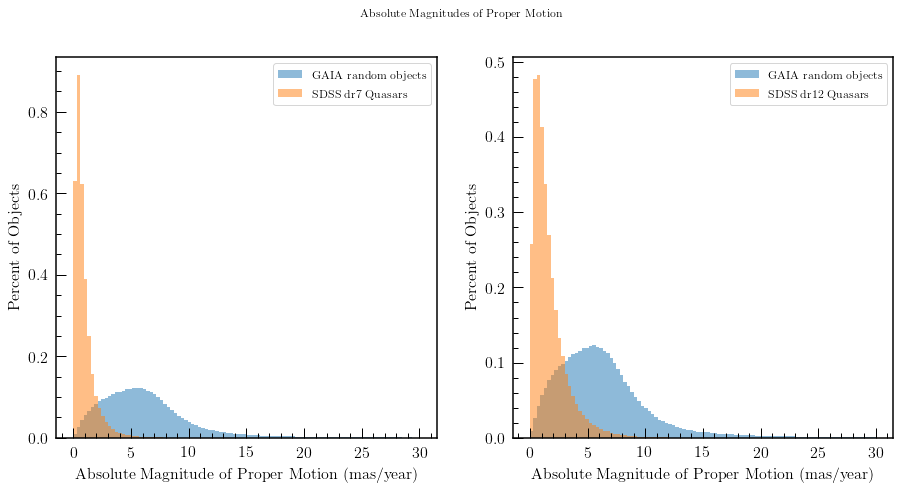

In [28]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(fulltable, bins=100, range = (0, 30), alpha=0.5, label = 'GAIA random objects', density = True)
plt.hist(dr7_pmabs, bins=100, range = (0, 30), alpha=0.5, label = 'SDSS dr7 Quasars', density = True)
plt.xlabel('Absolute Magnitude of Proper Motion (mas/year)')
plt.ylabel('Percent of Objects')
plt.legend()
plt.subplot(122)
plt.hist(fulltable, bins=100, range = (0, 30), alpha=0.5, label = 'GAIA random objects', density = True)
plt.hist(dr12_pmabs, bins=100, range = (0, 30), alpha=0.5, label = 'SDSS dr12 Quasars', density = True)
plt.xlabel('Absolute Magnitude of Proper Motion (mas/year)')
plt.ylabel('Percent of Objects')
plt.legend()
plt.suptitle('Absolute Magnitudes of Proper Motion')